# Step 1 : Get Data

Dataset Link : https://www.kaggle.com/datasets/camnugent/california-housing-prices

Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity



In [1]:
!unzip /content/housing.zip

unzip:  cannot find or open /content/housing.zip, /content/housing.zip.zip or /content/housing.zip.ZIP.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np


housing = pd.read_csv('/content/housing.csv', sep=",")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Step 2 : Visualizing and Understanding Data

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
housing[housing['ocean_proximity']=='ISLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


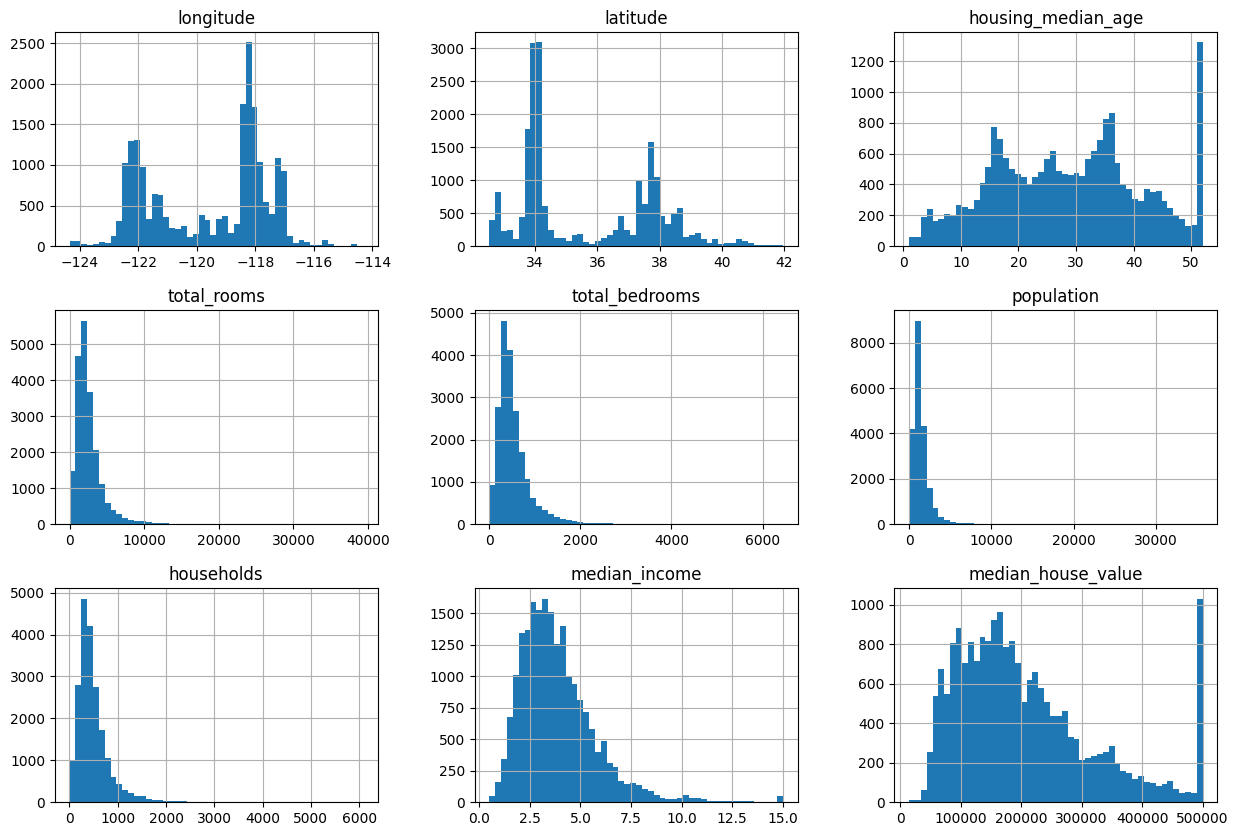

In [11]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

In [12]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)

In [13]:
print(f"Train_set_shape : {train_set.shape} , Test_set_shape : {test_set.shape}")

Train_set_shape : (16512, 10) , Test_set_shape : (4128, 10)


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 10385 to 20262
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4097 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


# Step 3 : Exploring and Visualizing Data

In [16]:
data = housing.copy()

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='longitude', ylabel='latitude'>

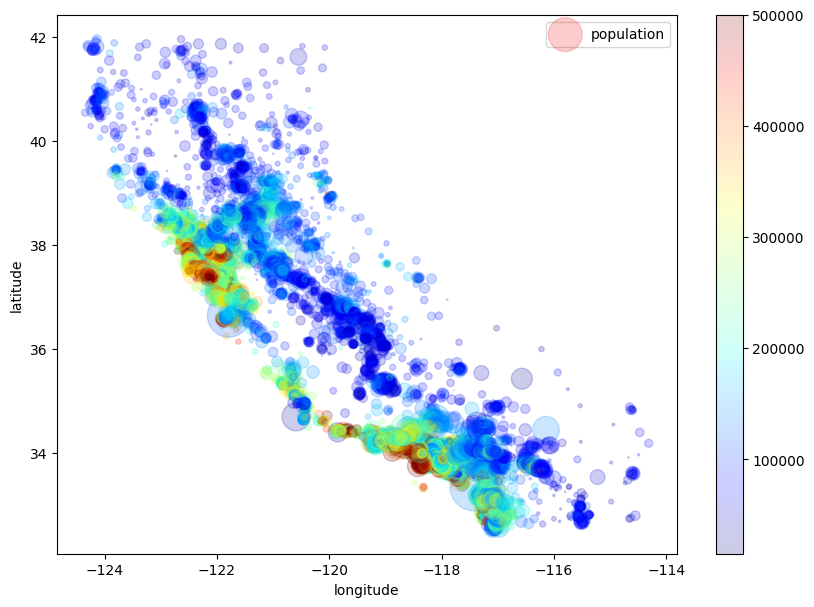

In [18]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, s=data['population']/30,
          label='population', figsize=(10,7),
          c=data['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)

In [19]:
# Standard Correlation Coefficient [-1, 1] -> Only linear dependencies are examined.
numeric_df = data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


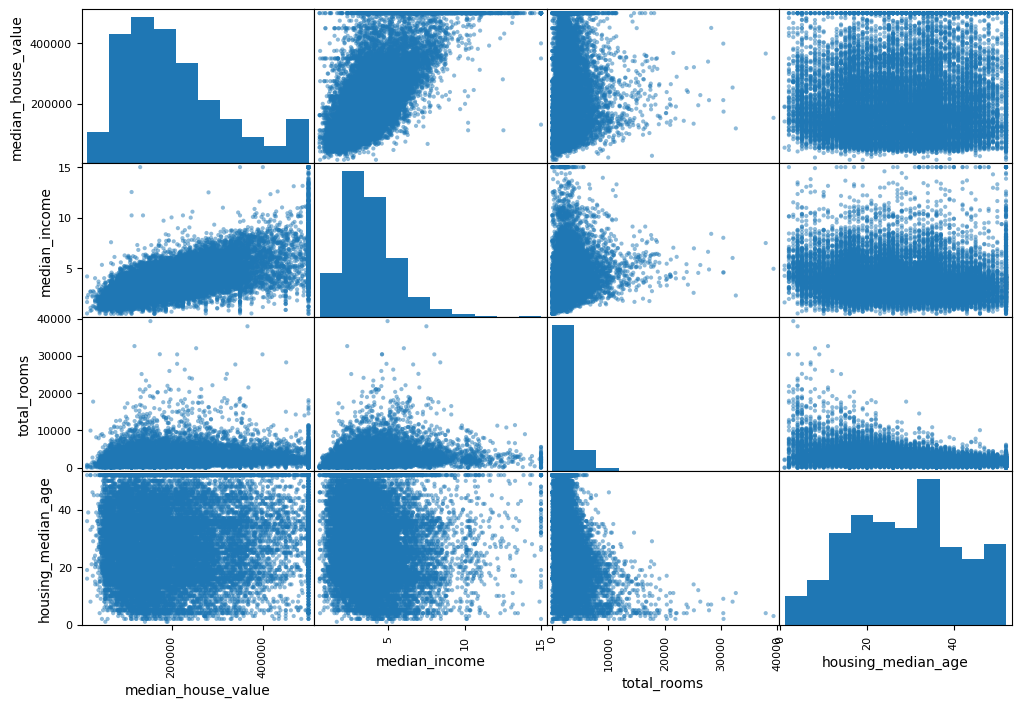

In [20]:
features = ["median_house_value", "median_income","total_rooms","housing_median_age"]
scatter_matrix(data[features], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

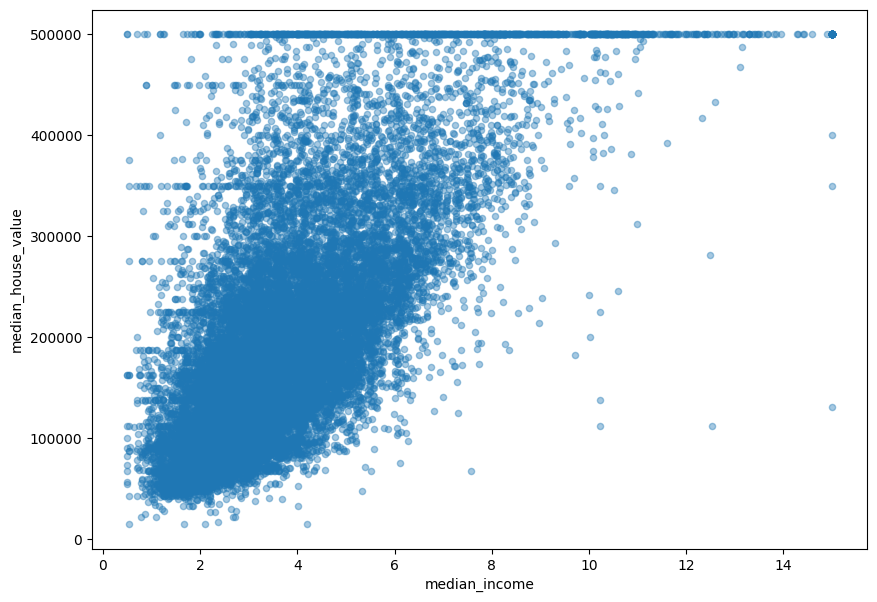

In [21]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.4, figsize=(10,7))

In [22]:
data['total_rooms_per_households'] = data['total_rooms']/data['households']
data['total_berooms_per_total_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_households'] = data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_berooms_per_total_rooms,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [23]:
numeric_df = data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms_per_households,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_households,-0.023737
population,-0.024650
longitude,-0.045967


It is true that the new feature total_rooms_per_households does not have a very high correlation, but it has a higher correlation with median_house_value than all other features except median_income. On the other hand, we found that the population of each household has no effect and is close to zero, but total_berooms_per_total_rooms has a good correlation value, which is a promising number.

# Step 4 : Preparing the Data

Numerical Data ===> missing values

Categorical and text data ===> Label Encoding, One Hot Encoding

Numerical data ===> Feature Scaling

Numerical data ===> Custom Transformers

In [24]:
# SimpleImputer
df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [25]:
df_num = df.drop('ocean_proximity', axis=1)

# ------- missing data (1.drop_rows, 2.drop_columns, 3.replace)
#df_num = de_num.dropna(subset=["total_bedrooms"]) # option 1
#df_num.drop("total_bedrooms", axis=1)             # option 2

#median = df_num["total_bedrooms"].median()        # option 3
#df_num["total_bedrooms"].fillna(median)           # option 3

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_num)
x = imputer.transform(df_num)
df_num_imputer_tr = pd.DataFrame(x, columns=df_num.columns)
df_num_imputer_tr.info()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 2072 to 2575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_r

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin


# Custom Transformers
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
  def fit(self, x, y=None):
    return self
  def transform(self, x, y=None):
    rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
    population_per_household = x[:, population_ix] / x[:, household_ix]
    bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
    return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]

custom = CombineAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_imputer_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_imputer_tr.columns)
columns.append("rooms_per_household")
columns.append("population_per_household")
columns.append("bedrooms_per_room")
data_custom_tr.columns = columns
data_custom_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,4.443645,3.350120,0.255262
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,5.976471,2.535294,0.171752
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,4.088785,4.350467,0.244571
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,2.740088,2.629956,0.368167
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,5.166667,3.037634,0.194069
5,-118.32,33.79,32.0,2381.0,467.0,1264.0,488.0,4.1477,4.879098,2.590164,0.196136
6,-118.43,34.01,31.0,2526.0,528.0,1046.0,504.0,4.7009,5.011905,2.075397,0.209026
7,-117.07,32.64,32.0,5135.0,1025.0,2152.0,944.0,4.1325,5.439619,2.279661,0.199611
8,-119.33,36.22,9.0,3748.0,644.0,1955.0,620.0,4.2011,6.045161,3.153226,0.171825
9,-122.47,37.50,18.0,2297.0,416.0,1086.0,381.0,4.8750,6.028871,2.850394,0.181106


In [27]:
data_custom_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,538.207607,1435.017260,501.135962,3.864091,5.412724,3.080506,0.213853
std,2.005033,2.139150,12.597980,2213.946369,423.071026,1158.151967,385.650673,1.893244,2.279264,10.933679,0.062848
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.846154,0.692308,0.037151
25%,-121.790000,33.930000,18.000000,1446.000000,297.000000,788.000000,280.000000,2.562500,4.441027,2.430380,0.175426
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,5.224884,2.821348,0.203395
75%,-118.010000,37.710000,37.000000,3154.000000,644.000000,1738.000000,606.000000,4.733225,6.047464,3.290106,0.240394
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,132.533333,1243.333333,1.827731


**Notice :** We need to adjust the range of numbers so that our machine learning algorithm works correctly. For example, in total-bedrooms, the minimum is 2 and the maximum is 6445, which machine learning algorithms do not have a good median with such large differences. We need to reduce this range so that our algorithm works more correctly.

We have two methods :
1. Standardization -> It calculates variances and differences.
2. Normalization -> [0,1] ---> problem in outliers

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810


In [29]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded, columns=["ocean_proximity"])
data_cat_encoded.head()

,ocean_proximity
0,1
1,0
2,1
3,0
4,1


This is not good in this case because machine learning algorithms consider the relationship between numbers, that is, it thinks that those that are 0 are related to those that are 1 and are not related to those that are 4 or are distant. This gives wrong information to our algorithm. This is the big problem of Label Encoders. That is why we use OneHotEncoder.

In [30]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

encoder_1hot = OneHotEncoder(sparse_output=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[["ocean_proximity"]])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names_out(["ocean_proximity"])

data_cat_1hot.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [31]:
final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810,0.0,1.0,0.0,0.0,0.0
5,0.620480,-0.858555,0.267947,-0.118873,-0.168316,-0.147668,-0.034063,0.149805,-0.234129,-0.044848,-0.281914,1.0,0.0,0.0,0.0,0.0
6,0.565617,-0.755707,0.188566,-0.053377,-0.024128,-0.335905,0.007427,0.442011,-0.175860,-0.091931,-0.076809,1.0,0.0,0.0,0.0,0.0
7,1.243930,-1.396168,0.267947,1.125097,1.150651,0.619094,1.148390,0.141776,0.011800,-0.073248,-0.226629,0.0,0.0,0.0,0.0,1.0
8,0.116733,0.277445,-1.557798,0.498595,0.250066,0.448990,0.308226,0.178011,0.277483,0.006651,-0.668750,0.0,1.0,0.0,0.0,0.0
9,-1.449373,0.875831,-0.843376,-0.156816,-0.288867,-0.301366,-0.311524,0.533972,0.270335,-0.021047,-0.521074,0.0,0.0,0.0,0.0,1.0


In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombineAttributesAdder(BaseEstimator, TransformerMixin):
  def fit(self, x, y=None):
    return self
  def transform(self, x, y=None):
    rooms_per_household = x[:, rooms_ix] / x[:, household_ix]
    population_per_household = x[:, population_ix] / x[:, household_ix]
    bedrooms_per_room = x[:, bedrooms_ix] / x[:, rooms_ix]
    return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]


class DataFrameSelector(BaseEstimator):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, x, y=None):
    return self
  def transform(self, x):
    return x[self.attribute_names].values

df = train_set.copy()
df_label =df["median_house_value"].copy()
df = df.drop("median_house_value", axis=1)


df_num = df.drop(["ocean_proximity"], axis=1)


num_attrs = list(df_num)
cat_attrs = ["ocean_proximity"]


num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('cat_selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

cat_pipeline.fit_transform(df)


array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [64]:
housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',
                                                              'population','households','median_income','rooms_per_household',
                                                              'population_per_household','bedrooms_per_room','ocean_proximity_<1H OCEAN',
                                                              'ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY',
                                                              'ocean_proximity_NEAR OCEAN'])
housing_prepared_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,-0.425185,0.024660,0.658887,0.0,1.0,0.0,0.0,0.0
1,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,0.247344,-0.049867,-0.669911,1.0,0.0,0.0,0.0,0.0
2,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,-0.580880,0.116155,0.488784,0.0,1.0,0.0,0.0,0.0
3,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,-1.172623,-0.041209,2.455426,1.0,0.0,0.0,0.0,0.0
4,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,-0.107958,-0.003921,-0.314810,0.0,1.0,0.0,0.0,0.0
5,0.620480,-0.858555,0.267947,-0.118873,-0.168316,-0.147668,-0.034063,0.149805,-0.234129,-0.044848,-0.281914,1.0,0.0,0.0,0.0,0.0
6,0.565617,-0.755707,0.188566,-0.053377,-0.024128,-0.335905,0.007427,0.442011,-0.175860,-0.091931,-0.076809,1.0,0.0,0.0,0.0,0.0
7,1.243930,-1.396168,0.267947,1.125097,1.150651,0.619094,1.148390,0.141776,0.011800,-0.073248,-0.226629,0.0,0.0,0.0,0.0,1.0
8,0.116733,0.277445,-1.557798,0.498595,0.250066,0.448990,0.308226,0.178011,0.277483,0.006651,-0.668750,0.0,1.0,0.0,0.0,0.0
9,-1.449373,0.875831,-0.843376,-0.156816,-0.288867,-0.301366,-0.311524,0.533972,0.270335,-0.021047,-0.521074,0.0,0.0,0.0,0.0,1.0


# Step 5 : Model selection and training

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

sample_data_ptepared = housing_prepared_df.iloc[:4]
print("Predictions: \t", lin_reg.predict(sample_data_ptepared))

sample_labels = df_label.iloc[:4]
print("Labels: \t\t", list(sample_labels))

Predictions: 	 [ 35948.11365309 315970.75227185  61237.85008003 152762.03983994]
Labels: 		 [72000.0, 274100.0, 58300.0, 200000.0]


In [67]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression RMSE(Average difference from real data) : {lin_rmse}")

Linear Regression RMSE(Average difference from real data) : 68002.59920052272


In [73]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # --------------> we are not split train and test data

0.0

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
  print("------------ ",model_name," ---------------")
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())
  print("-------------------------------------------------------")


display_scores(trees_rmse_scores, "Decision Tree Regression")

------------  Decision Tree Regression  ---------------
Scores:  [66124.91817334 67615.12040176 68935.34341729 70135.8299519
 69450.73529312 70471.09338128 73125.76988972 74819.98018935
 70897.0192224  73384.45585268]
Mean:  70496.02657728366
Standard deviation:  2553.054673289132
-------------------------------------------------------


In [77]:
linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
display_scores(linear_rmse_scores, "Linrear Regression")

------------  Linrear Regression  ---------------
Scores:  [69950.61650899 63993.05359694 66324.31912505 70399.13260056
 71946.10805597 68108.91634653 66321.73105565 66916.82419747
 68092.51266868 70485.9307219 ]
Mean:  68253.91448777319
Standard deviation:  2313.9023397177803
-------------------------------------------------------


In this test Linear Regrassion better than Decision Tree Regression

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, df_label, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores, "Random Forest Regression")

------------  Random Forest Regression  ---------------
Scores:  [51037.34995034 47417.7173371  47049.84324713 49688.01697212
 49400.72783151 49230.88495325 50457.42910702 51656.76010808
 49868.96576931 52602.12258509]
Mean:  49840.98178609769
Standard deviation:  1642.7154796679774
-------------------------------------------------------


# Step 6 : Model settings and final implementation

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 4, 6, 10, 30], 'max_features': [2, 6, 8, 15]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df, df_label)

print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Parameters:  {'max_features': 6, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=6, n_estimators=30)


In [81]:
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
  print(np.sqrt(-mean_score), params)


63161.15243453103 {'max_features': 2, 'n_estimators': 3}
60112.84860301895 {'max_features': 2, 'n_estimators': 4}
57894.821101547524 {'max_features': 2, 'n_estimators': 6}
54892.43786318493 {'max_features': 2, 'n_estimators': 10}
52793.73790371019 {'max_features': 2, 'n_estimators': 30}
59188.06802739274 {'max_features': 6, 'n_estimators': 3}
56899.77935133825 {'max_features': 6, 'n_estimators': 4}
54201.46530741349 {'max_features': 6, 'n_estimators': 6}
51770.14226297864 {'max_features': 6, 'n_estimators': 10}
49683.32451792209 {'max_features': 6, 'n_estimators': 30}
59553.046373781384 {'max_features': 8, 'n_estimators': 3}
56459.840713727164 {'max_features': 8, 'n_estimators': 4}
53844.334617865876 {'max_features': 8, 'n_estimators': 6}
51926.88817582684 {'max_features': 8, 'n_estimators': 10}
50247.86563986051 {'max_features': 8, 'n_estimators': 30}
58672.109557076416 {'max_features': 15, 'n_estimators': 3}
57148.10125749409 {'max_features': 15, 'n_estimators': 4}
55217.00526768061 

In [84]:
# Test the final model on the test set

final_model = grid_search.best_estimator_
x = test_set.drop("median_house_value", axis=1)
y = test_set["median_house_value"].copy()
x_prepared = full_pipeline.transform(x)
final_predictions = final_model.predict(x_prepared)
final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


49197.82741391914